In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set_theme(style='darkgrid',palette='viridis')
%matplotlib inline

In [2]:
df = pd.read_csv('crime_data.csv', index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
df.shape

(50, 4)

In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<Axes: >

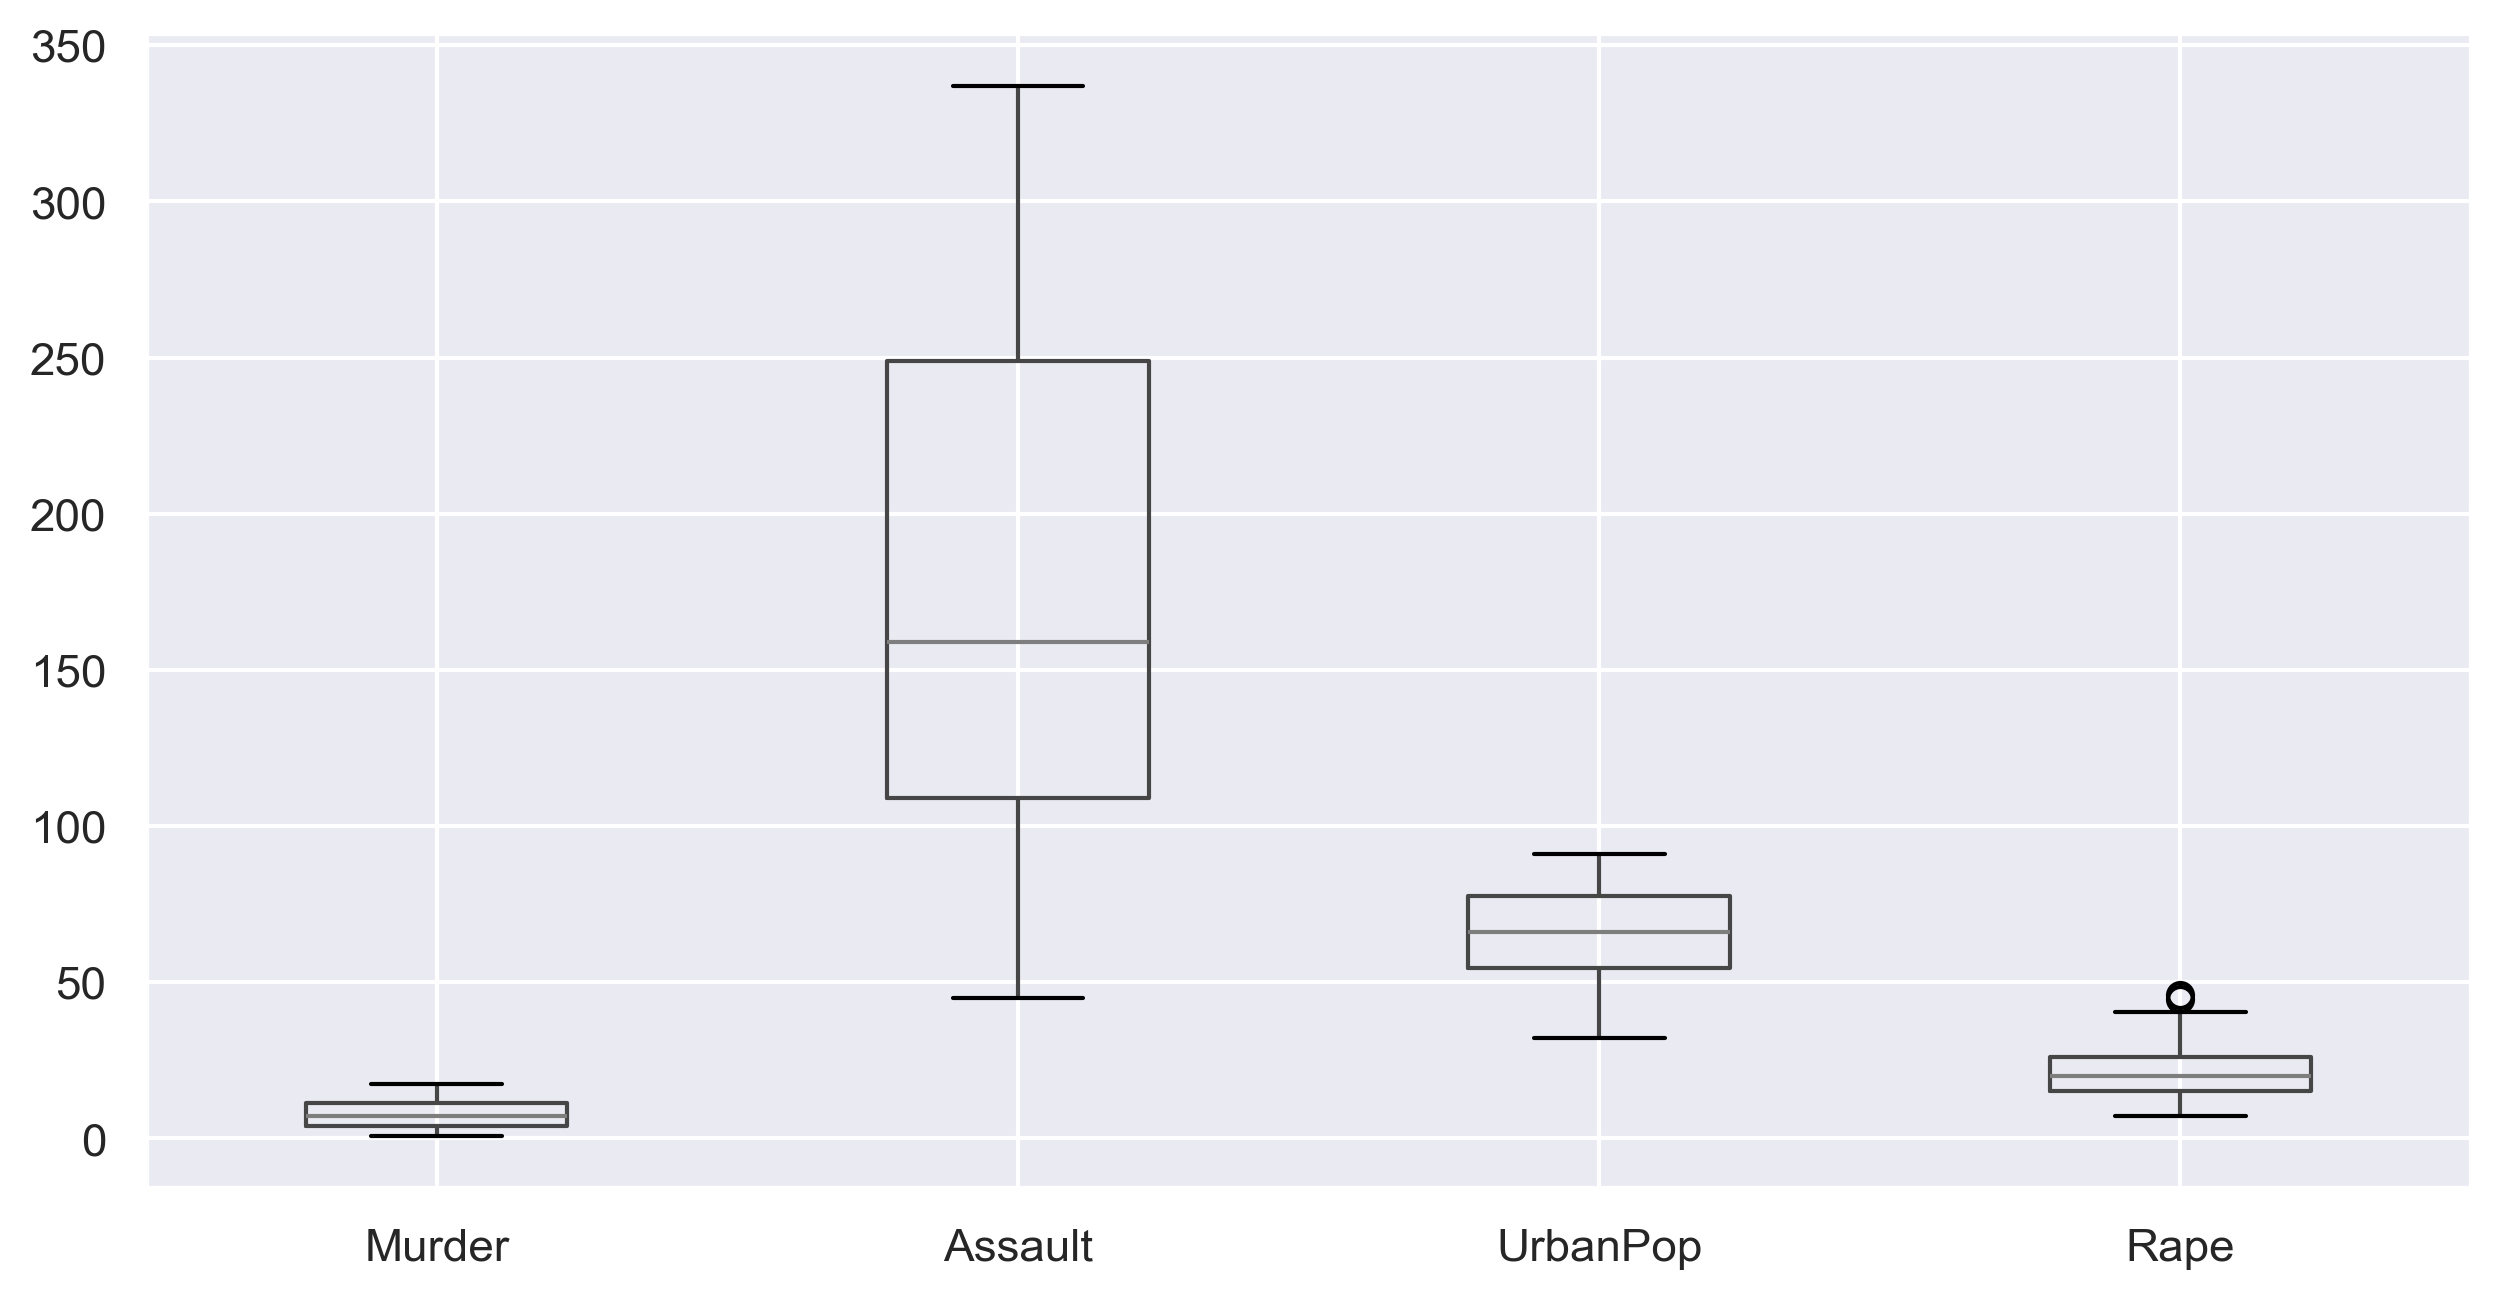

In [4]:
df.boxplot()

In [6]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [7]:
df = remove_outliers_iqr(df, 'Rape')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

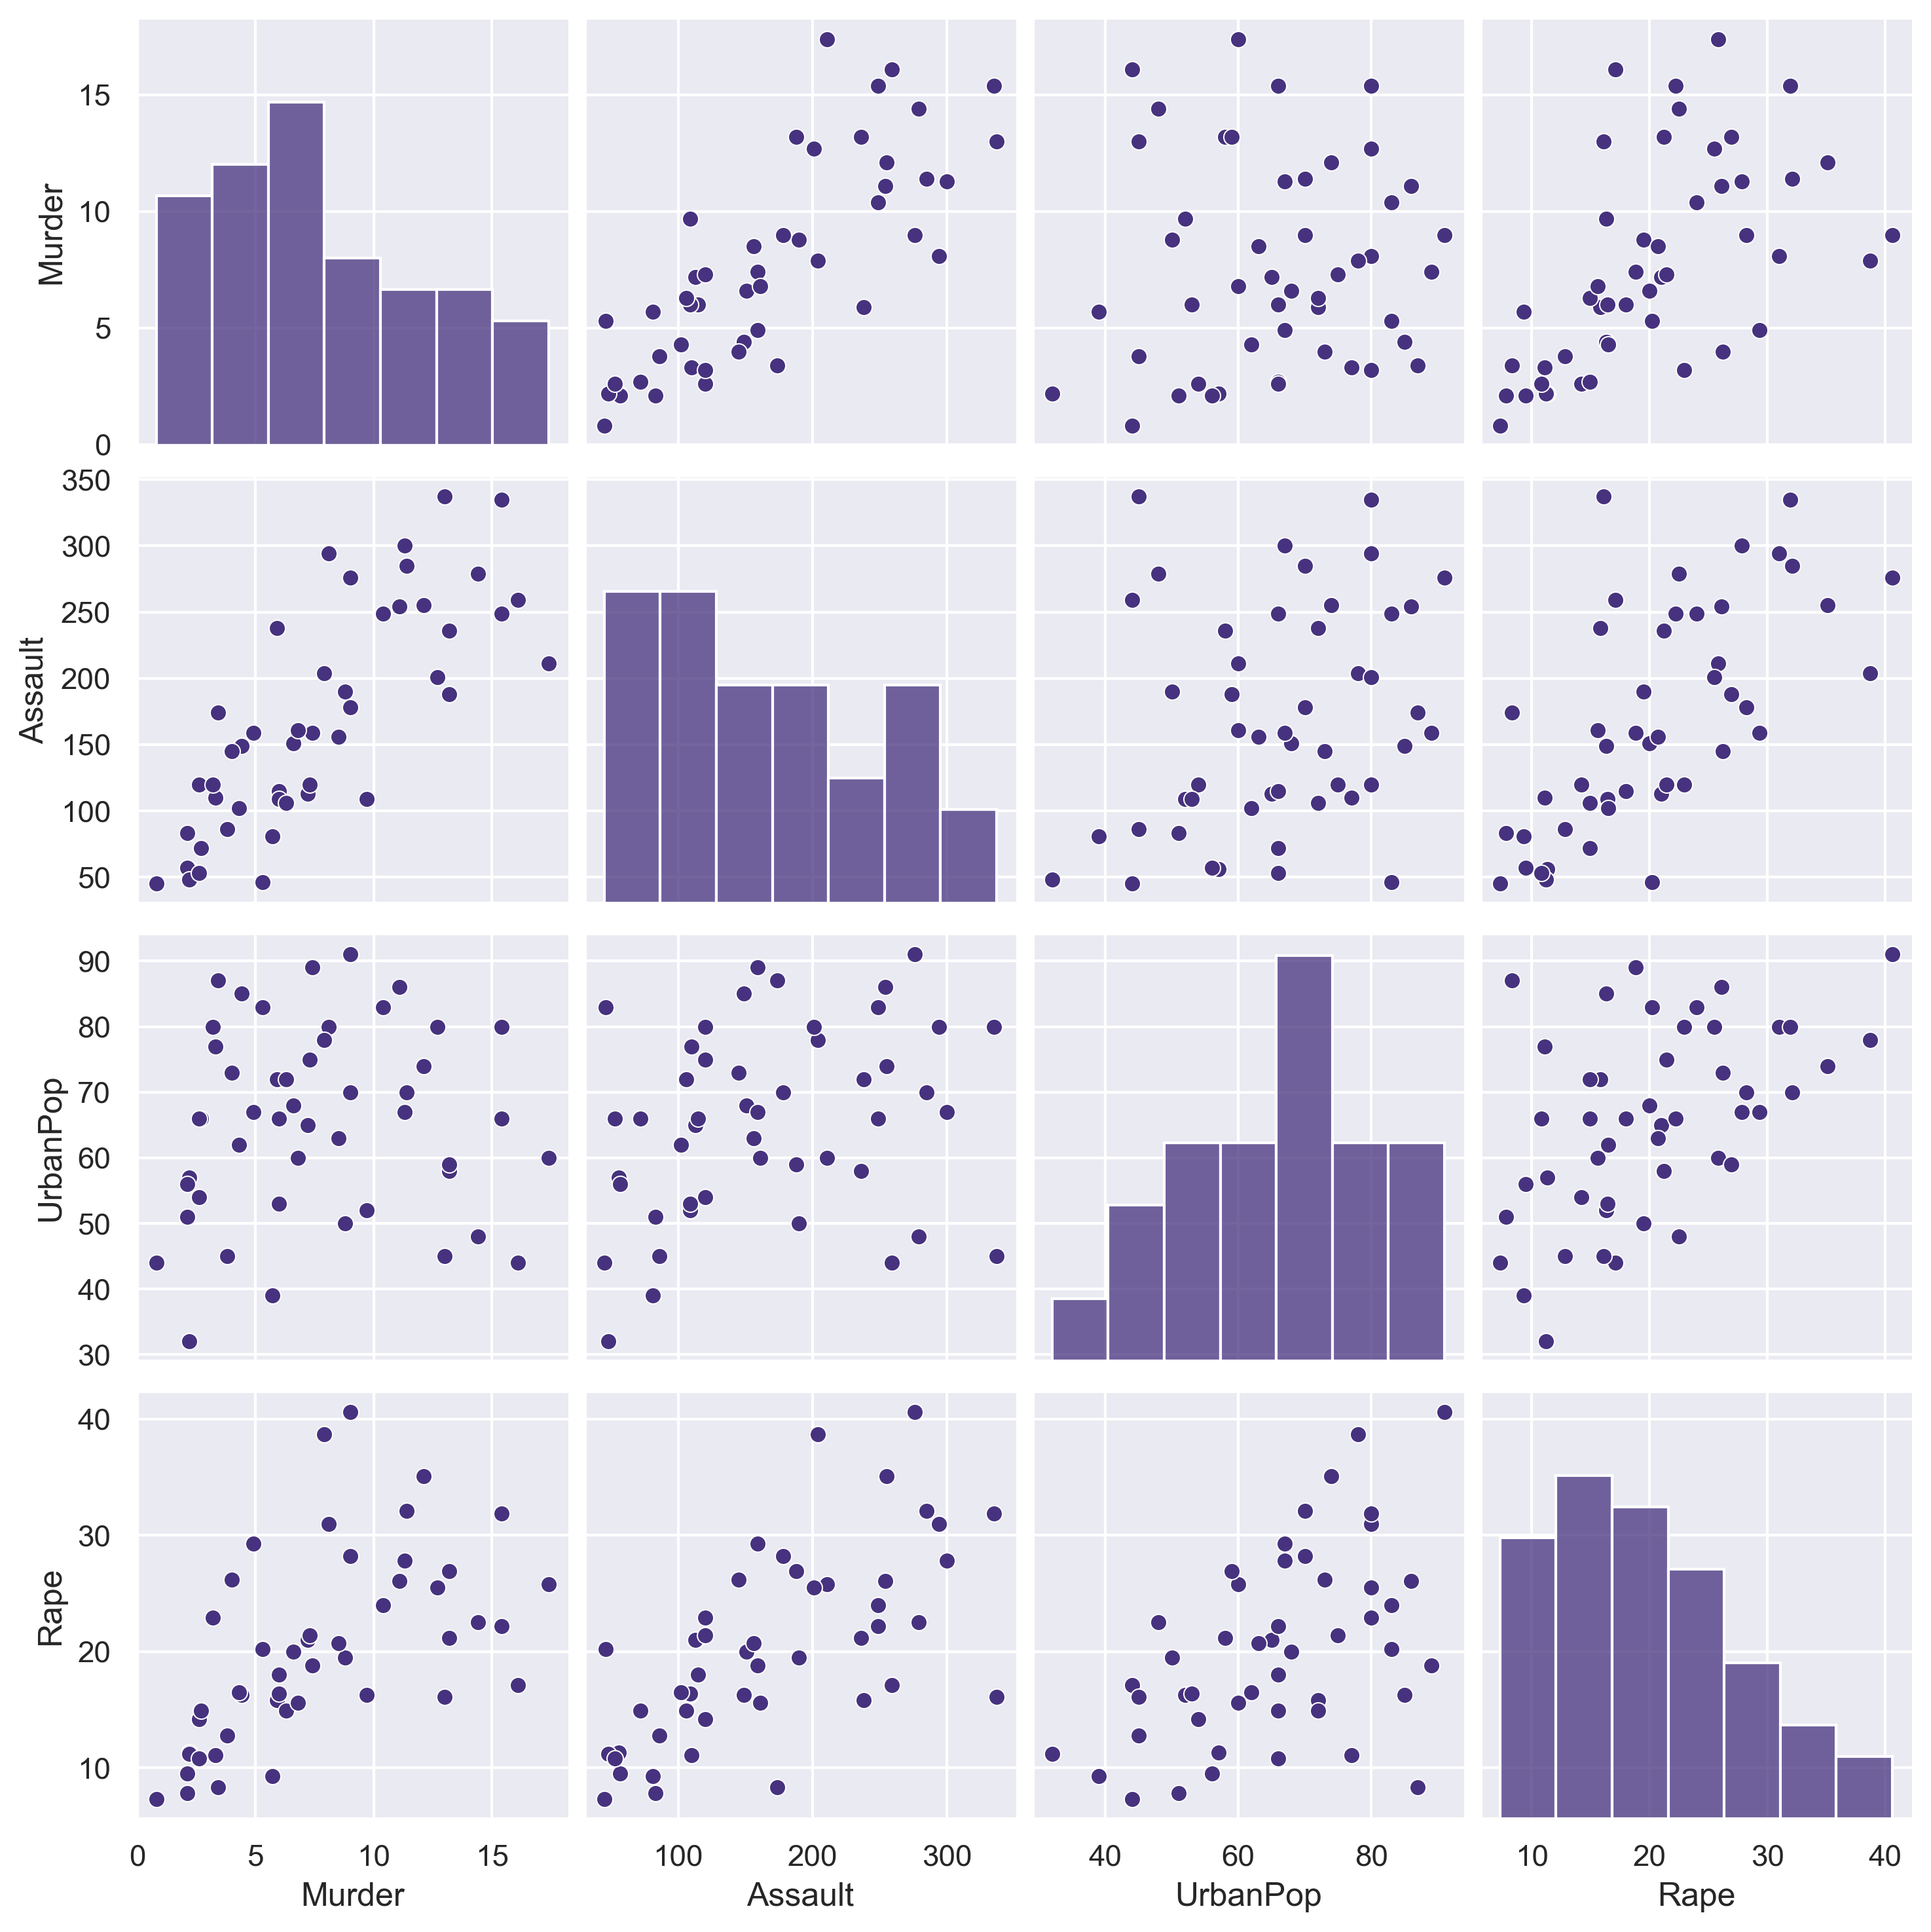

In [8]:
sns.pairplot(df)

In [9]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

In [11]:
from sklearn.cluster import DBSCAN

In [33]:
db = DBSCAN(eps=0.5, min_samples=3)

yp = db.fit_predict(x)

In [34]:
yp

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [35]:
from sklearn.neighbors import NearestNeighbors

In [36]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [37]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilon value')

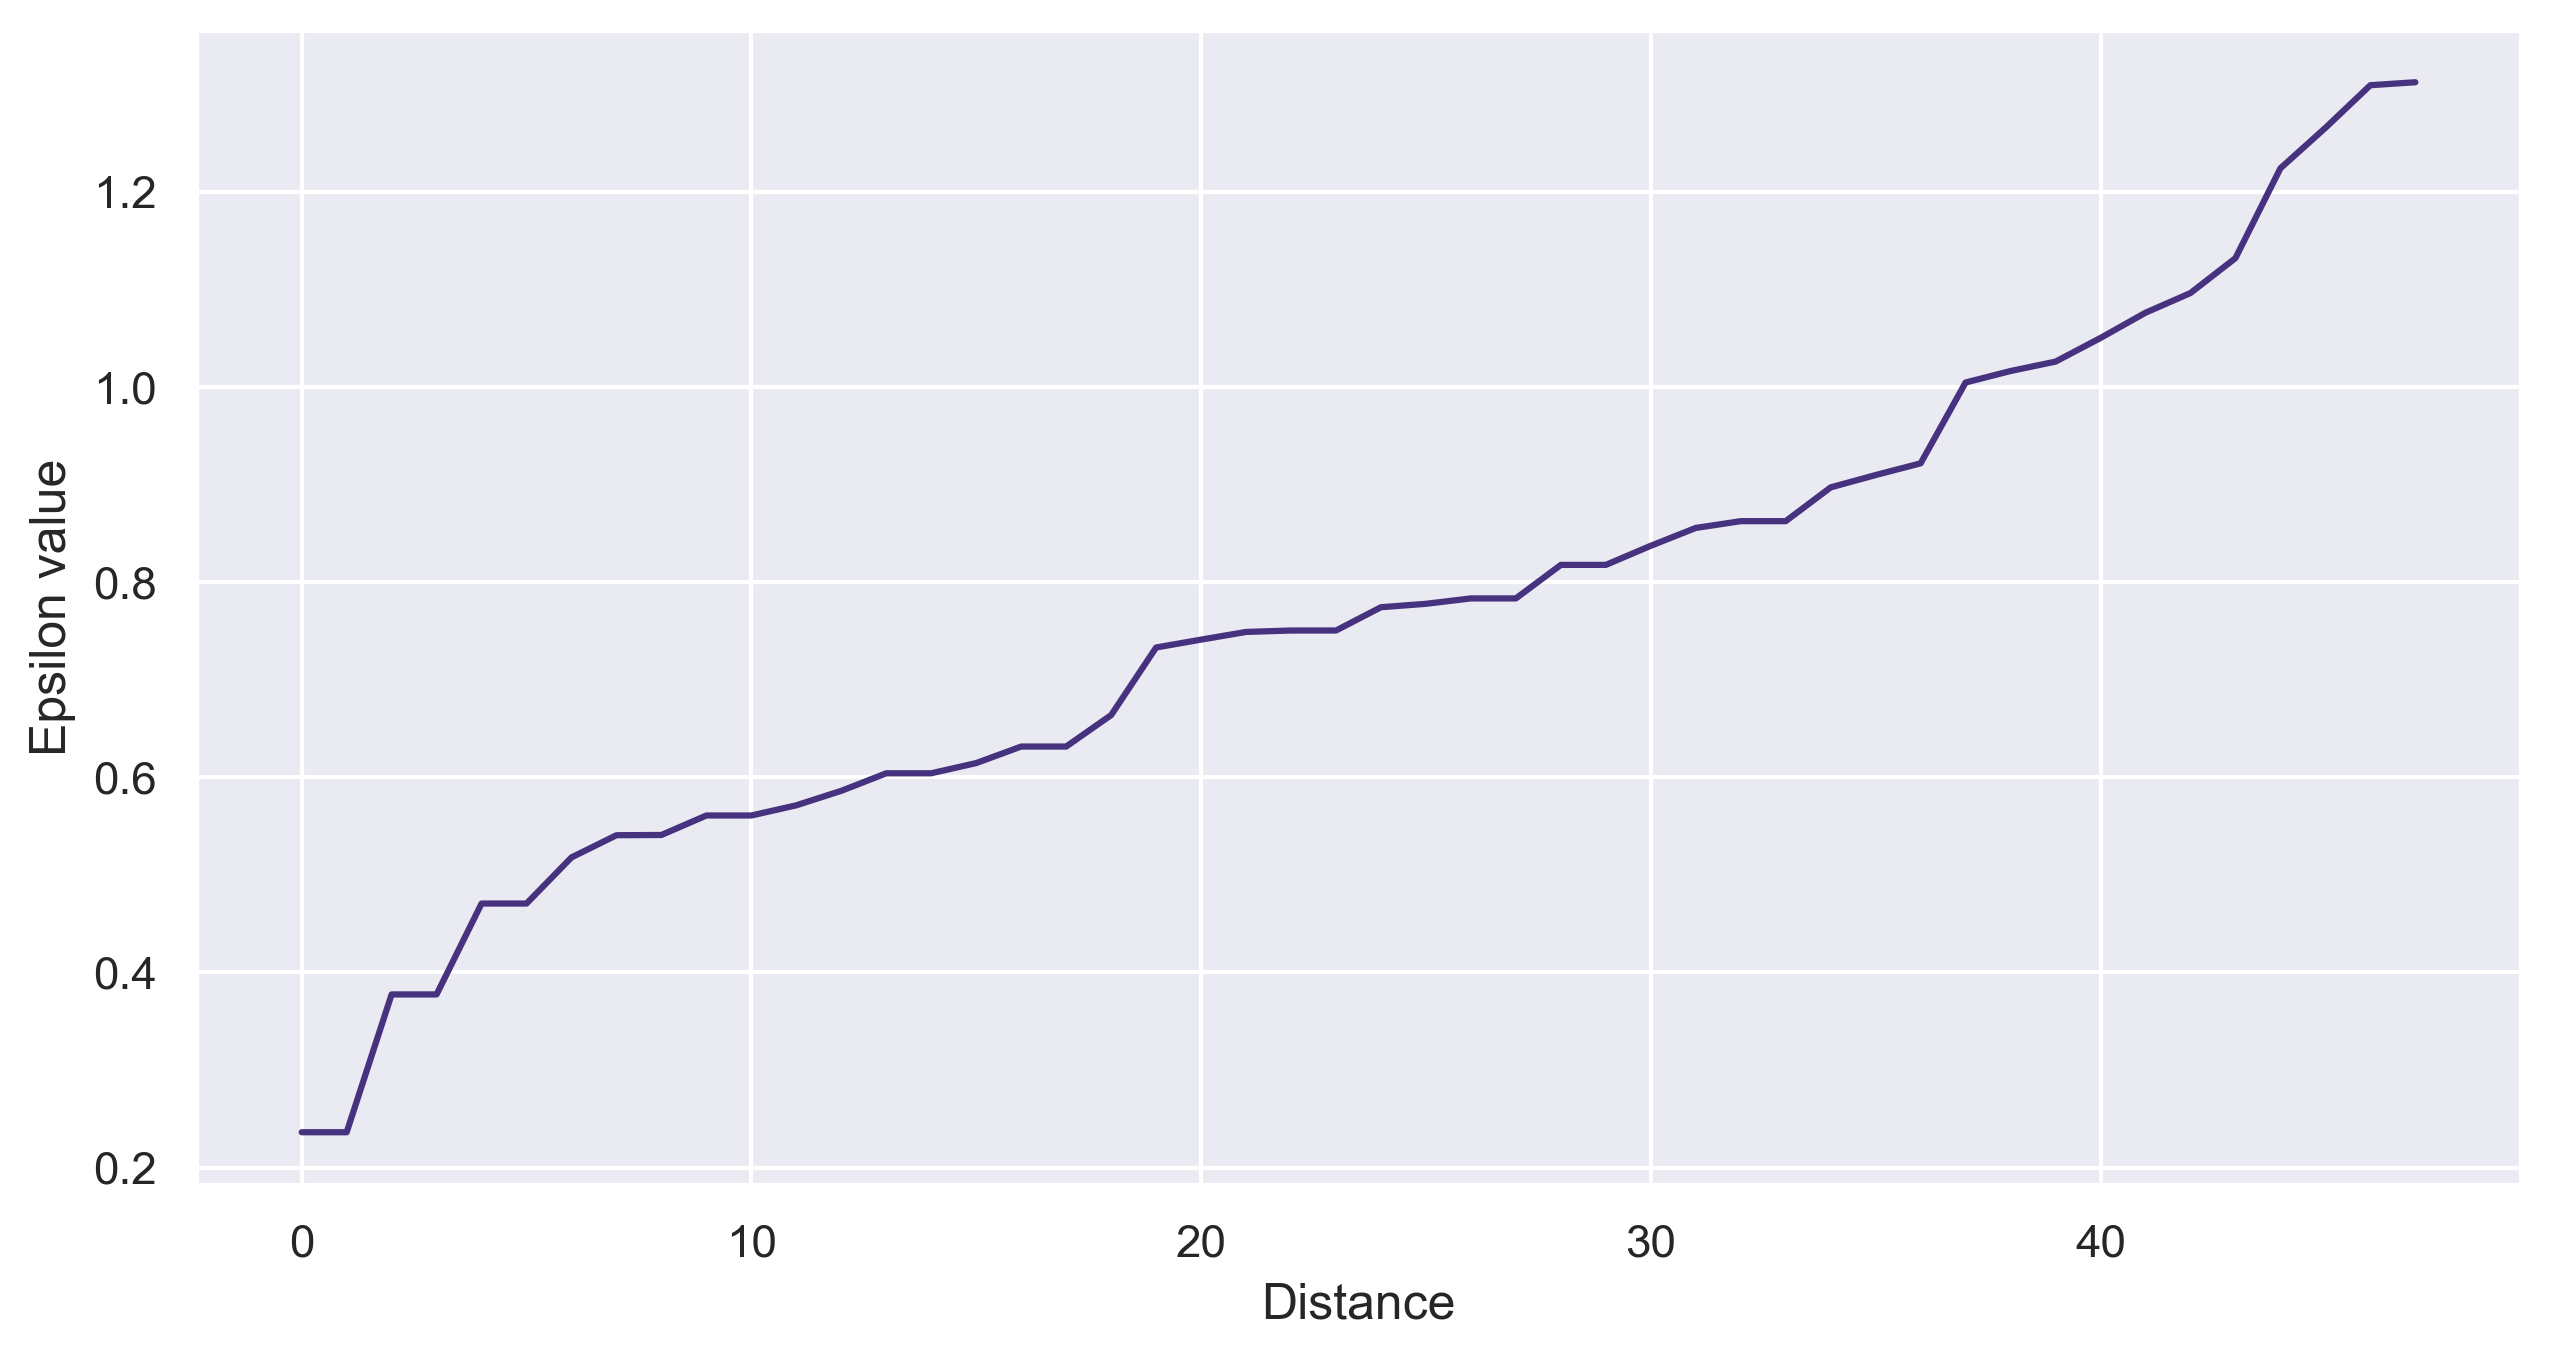

In [38]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [39]:
db = DBSCAN(eps=0.7,min_samples=3)
ypred = db.fit_predict(x)
ypred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  1, -1,  1,  0, -1, -1, -1,  0,  0, -1,  1, -1, -1, -1,  0,  0,
       -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1],
      dtype=int64)

In [40]:
silhouette_score(x,ypred)

-0.07959429714572276

In [42]:
df['cluster'] = ypred
df

C:\Users\Pranita\AppData\Local\Temp\ipykernel_16380\714959409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = ypred


,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,-1
Delaware,5.9,238,72,15.8,-1
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1
Hawaii,5.3,46,83,20.2,-1


In [43]:
df['cluster'].value_counts()

cluster
-1    33
 0    12
 1     3
Name: count, dtype: int64